In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas
import cv2
from tqdm import tqdm

In [3]:
data_dir="D:/learn/data/intel-image-classification/seg_train"
categories=["buildings","forest","glacier","mountain","sea","street"]


In [4]:
img_size=150

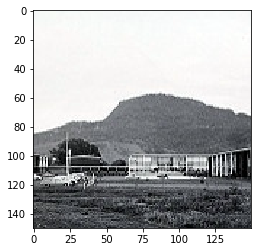

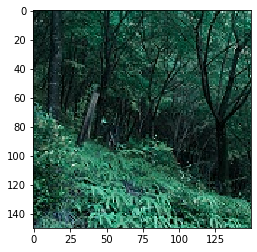

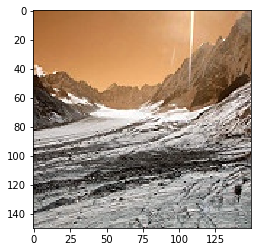

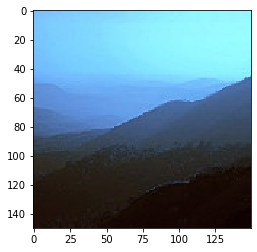

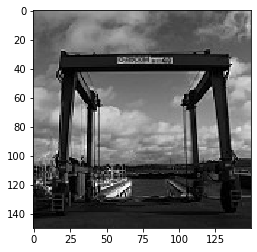

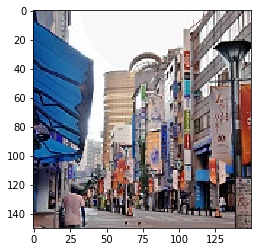

150


In [9]:
for category in categories:
    path=os.path.join(data_dir,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
print(img_array.shape[0])

In [10]:
training_data=[]

def create_training():
    for category in categories:
        path=os.path.join(data_dir,category)
        class_num=categories.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except:
                pass


In [11]:
create_training()

100%|█████████████████████████████████████████████████████████████████████████████| 2382/2382 [00:10<00:00, 222.42it/s]


In [12]:

import random
random.shuffle(training_data)
x=[]
y=[]
for features,labels in training_data:
    x.append(features)
    y.append(labels)
print(len(x))

14034


In [13]:
x=np.array(x)
y=np.array(y)
print(x.shape)

(14034, 150, 150, 3)


In [14]:
import pickle
save_data=open("X.pickle","wb")
pickle.dump(x,save_data)
save_data.close()

save_data=open("Y.pickle","wb")
pickle.dump(y,save_data)
save_data.close()